In [28]:
from __future__ import division
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import requests
import os
from dotenv import load_dotenv
import json

In [29]:
load_dotenv()

True

In [30]:
quandl_api = os.getenv("quandl_api")

In [31]:
type(quandl_api)

NoneType

In [32]:
import quandl
y_tif_equity = quandl.get("WIKI/TIF",start_date="2000-01-01",end_date="2018-01-01")["Close"]
y_tif_equity

Date
2000-01-03     84.94
2000-01-04     82.25
2000-01-05     80.25
2000-01-06     77.00
2000-01-07     82.44
               ...  
2017-12-22    102.84
2017-12-26    105.20
2017-12-27    105.24
2017-12-28    104.22
2017-12-29    103.95
Name: Close, Length: 4527, dtype: float64

In [33]:
gold = quandl.get('LBMA/GOLD', start_date="2000-01-01",end_date="2018-01-01")
gold = gold.rename(columns={'USD (PM)': 'gold'})
gold = gold["gold"]


In [34]:
silver = quandl.get('LBMA/SILVER', start_date="2000-01-01",end_date="2018-01-01")
silver = silver.rename(columns={'USD': 'silver'})["silver"]


In [35]:
x_closing_prices_df = pd.DataFrame()
x_closing_prices_df = pd.concat([gold, silver], axis=1)


In [36]:
new_dataframe = x_closing_prices_df.merge(y_tif_equity,left_index=True, right_index=True)

In [37]:
new_dataframe.rename(columns={"gold":"Gold","silver":"Silver","Close":"TIF Close"},inplace=True)

In [38]:
new_dataframe.dropna(inplace=True)

In [39]:
y = new_dataframe["TIF Close"].values
x = new_dataframe.drop(columns="TIF Close").values

In [40]:
from sklearn.model_selection import train_test_split
#splitting the data to train the model and using 30% of the data for training and 70% for actual data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=0)

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred = model.predict(x_test)

In [43]:
model.predict([[1000,12]])

array([66.0625001])

In [44]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,y_pred)

In [45]:
r2_score

0.5117754287568343

Text(0, 0.5, 'Predicted Data')

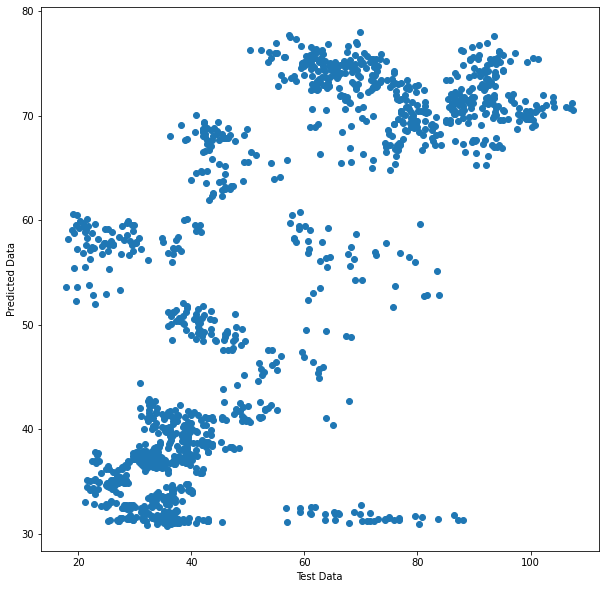

In [46]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred)
plt.xlabel("Test Data")
plt.ylabel("Predicted Data")